In [1]:
import sys
sys.path.insert(1, 'functions')
import numpy as np
import pandas as pd
import scipy.io
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from normality_function import normality_fun
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
import statsmodels
from scipy.interpolate import interp1d
from scipy import signal
from scipy.fft import fftshift
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

# Import mat files
mat_angle = scipy.io.loadmat('data/angle_40bpm.mat')
mat_emg1 = scipy.io.loadmat('data/emg1_40bpm.mat')
mat_emg2 = scipy.io.loadmat('data/emg2_40bpm.mat')

# Convert them to numpy arrays
angle = np.array(mat_angle['angle1'])
emg1 = np.array(mat_emg1['emg1'])
emg2 = np.array(mat_emg2['emg2'])
T = 0.001
N = emg1.shape[0]

# Normalize data
scaler = preprocessing.StandardScaler().fit(emg1)
emg1 = scaler.transform(emg1)
scaler = preprocessing.StandardScaler().fit(emg2)
emg2 = scaler.transform(emg2)


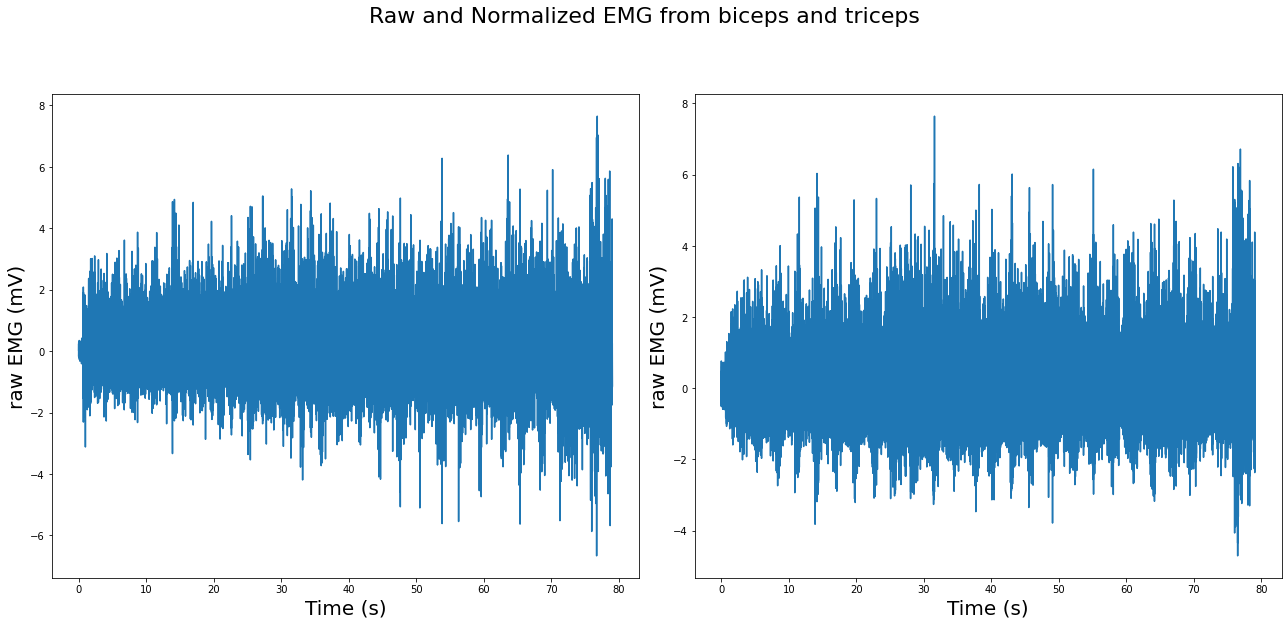

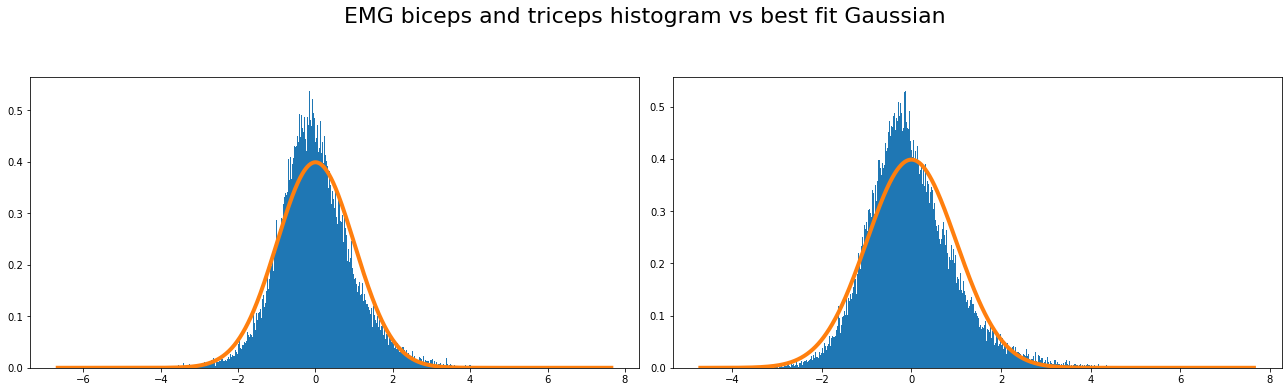

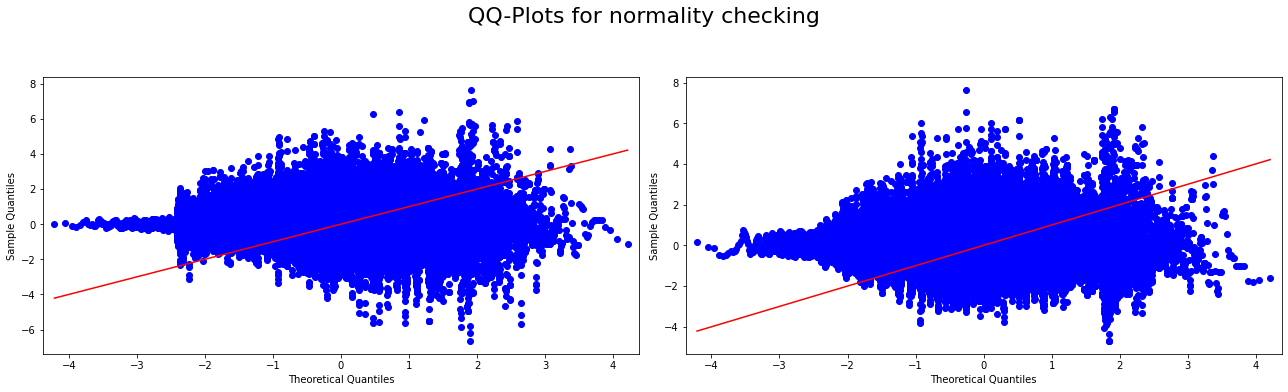

Statistics=5552.241, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=9556.130, p=0.000
Sample does not look Gaussian (reject H0)


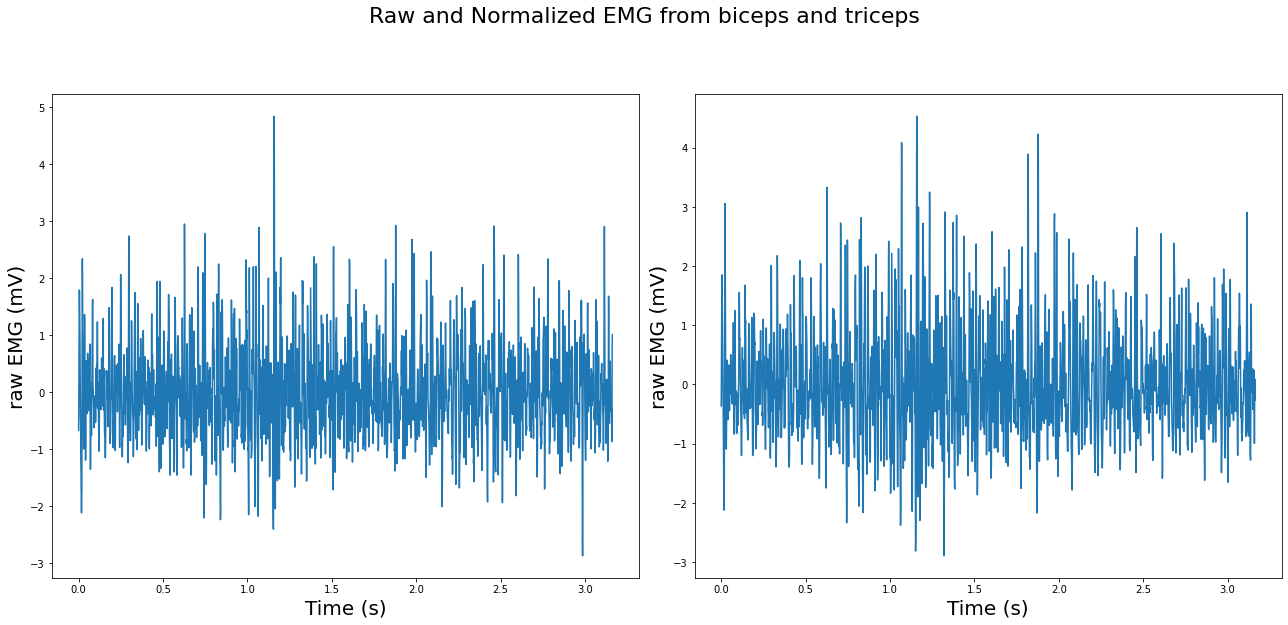

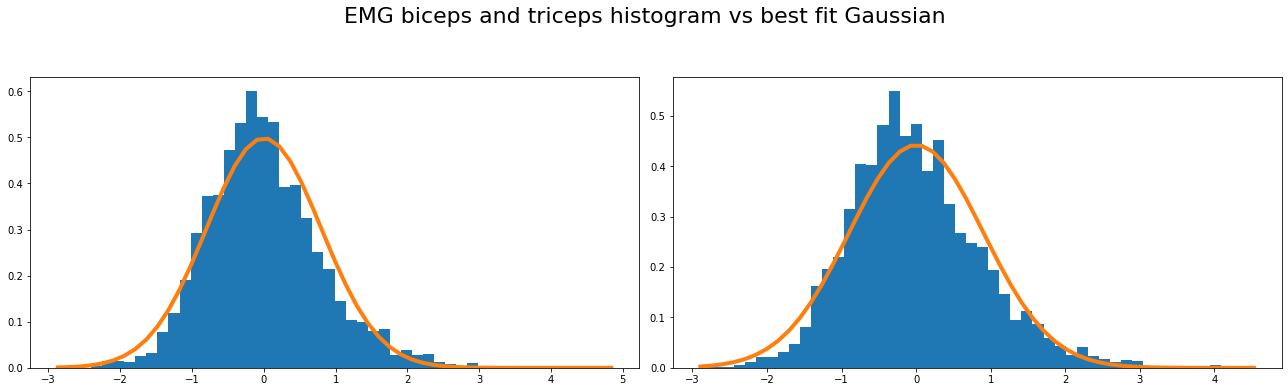

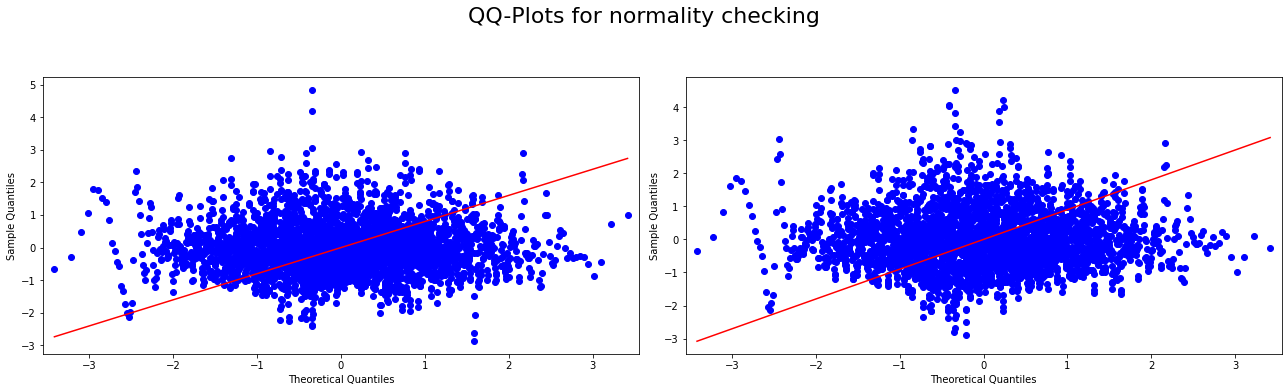

Statistics=220.924, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=264.931, p=0.000
Sample does not look Gaussian (reject H0)


In [15]:
# Test normality
n = 1000
normality_fun(emg1, emg2, n)

# Perform tests in a smaller quantity
emg1_small = emg1[int(0.2*N):int(0.24*N)]
emg2_small = emg2[int(0.2*N):int(0.24*N)]

# Test normality on smaller sample
n = 50
normality_fun(emg1_small, emg2_small, n)

## <span style='font-family:"Times New Roman"'> <span styel=''>The Dickey-Fuller test was implemented due to the lack of signal normality observed previously.
    
## <span style='font-family:"Times New Roman"'> <span styel=''>A classical Statistical hypothesis worklow for stationarity evaluation consists of taking dual tests between different signal segments.
## <span style='font-family:"Times New Roman"'> <span styel=''>With: 
    
    

$ \large{Y \sim N(\mu, \sigma) = \hat{\mu_{t_{01}}} - \hat{\mu_{t_{34}}} = \frac{\sum_{t=t_0}^{t_1} x_t }{t_1 - t_0} - \frac{\sum_{t=t_0}^{t_1} x_t}{t_2 - t_3}} $

## <span style='font-family:"Times New Roman"'> <span styel=''> And can be considered normal as a sum of normals, if:

$ \large{X_t \sim N(\mu, \sigma)}$
    
## <span style='font-family:"Times New Roman"'> <span styel=''> ,which in our case does not hold
    
    


    
## <span style='font-family:"Times New Roman"'> <span styel=''>We shall now computer the ACFs of the whole series of biceps and triceps data, as well as, the ACFs of smaller windows and the comparative acfs between neighbouring segments.
    

    
    



<bound method Figure.tight_layout of <Figure size 1296x1008 with 6 Axes>>

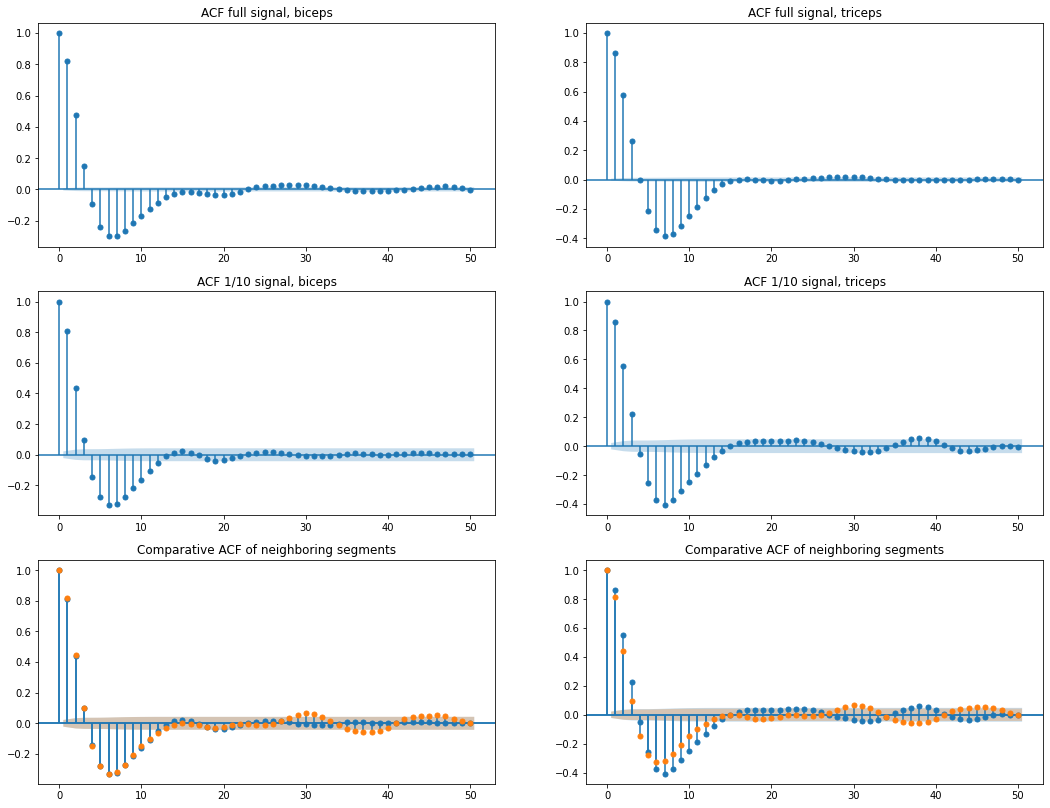

In [6]:
plt.rcParams["figure.figsize"] = (18,14)

fig, axs = plt.subplots(3, 2)
sm.graphics.tsa.plot_acf(emg1, lags=50, ax=axs[0,0], title="ACF full signal, biceps")
sm.graphics.tsa.plot_acf(emg2, lags=50, ax=axs[0,1], title="ACF full signal, triceps")
sm.graphics.tsa.plot_acf(emg1[int(0.2*N):int(0.3*N)], lags=50, ax=axs[1,0], title="ACF 1/10 signal, biceps")
sm.graphics.tsa.plot_acf(emg2[int(0.2*N):int(0.3*N)], lags=50, ax=axs[1,1], title="ACF 1/10 signal, triceps")
sm.graphics.tsa.plot_acf(emg1[int(0.2*N):int(0.3*N)], lags=50, ax=axs[2,0])
sm.graphics.tsa.plot_acf(emg1[int(0.3*N):int(0.4*N)], lags=50, ax=axs[2,0], title="Comparative ACF of neighboring segments")
sm.graphics.tsa.plot_acf(emg2[int(0.2*N):int(0.3*N)], lags=50, ax=axs[2,1])
sm.graphics.tsa.plot_acf(emg1[int(0.3*N):int(0.4*N)], lags=50, ax=axs[2,1], title="Comparative ACF of neighboring segments")
fig.tight_layout


    
## <span style='font-family:"Times New Roman"'> <span styel=''>It is obvious that there is no similarity between neighboring acfs and that the memory of the signal is of size 15-25 lags
    
    
## <span style='font-family:"Times New Roman"'> <span styel=''> Assuming normality, (which is not true) dual hypothesis testing is performed for the dataset, which is partitioned in 10 non-overlaping segments.